### ConvNeXtTiny

### Name - Anirudh Tyagi
### School - School Of Computing and Data Science
### E-mail - anirudh.t-26@scds.saiuniversity.edu.in

- #### Total number of images: 959
- #### Number of images per class:
    - Damask Rose images: 200
    - Rain Lily images: 199
    - Echeveria Flower images: 200
    - Mirabilis Jalapa images: 200
    - Zinnia Elegans images: 160
- #### Total number of images used for training and testing:
    - Training : 719
    - Testing : 240

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import glob
import PIL
from PIL import Image

2.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import load
X_train_std = load('/content/drive/MyDrive/DL PROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DL PROJECT/X_test_std.npy')
y_train = load('/content/drive/MyDrive/DL PROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DL PROJECT/y_test.npy')

In [ ]:
base_model = keras.applications.ConvNeXtTiny(
                include_top=False,
                weights="imagenet"
)
for layer in base_model.layers:
  layer.trainable = False

global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

x = keras.layers.BatchNormalization()(global_pool)
x = keras.layers.Dropout(0.15)(x)

output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model3_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
model3_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks3_TL = [
             keras.callbacks.ModelCheckpoint("bestTL3.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history3_TL = model3_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks3_TL)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 551ms/step - accuracy: 0.5260 - loss: 1.2810 - val_accuracy: 0.1528 - val_loss: 1.6998
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9788 - loss: 0.1306 - val_accuracy: 0.3333 - val_loss: 1.3146
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9967 - loss: 0.0531 - val_accuracy: 0.7222 - val_loss: 1.0037
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9936 - loss: 0.0416 - val_accuracy: 0.8472 - val_loss: 0.7529
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.9583 - val_loss: 0.5530
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9967 - loss: 0.0202 - val_accuracy: 1.0000 - val_loss: 0.3969
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 0.2762
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 1.0000 - loss: 0.0136 - val_accur

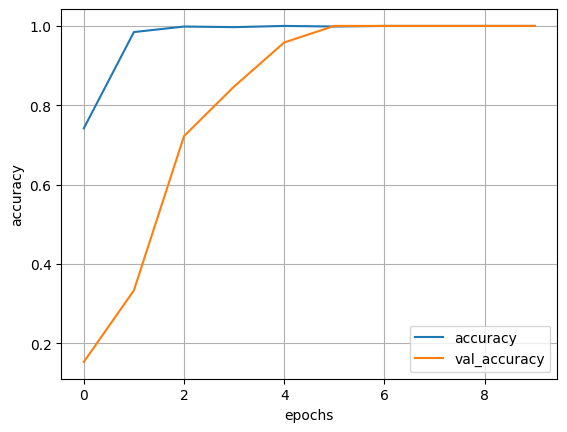

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history3_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
model3_TL.load_weights("bestTL3.weights.h5")

In [ ]:
model3_TL.save("/content/drive/MyDrive/DL PROJECT/Model3_TL.keras")